### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Read Dataset

In [2]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
df_fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [5]:
pd.unique(df_fish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [6]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

### Label Encoder


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_fish['species'] = le.fit_transform(df_fish['species'])
df_fish['species'].value_counts()


species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

### Split Independent dan Dependent Variabel

In [8]:
x = df_fish.drop('species', axis=1)
y = df_fish['species']


### Fitur Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

### Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Klasifikasi ID3

In [11]:
from sklearn.tree import DecisionTreeClassifier

### Entropy

In [12]:
entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Prediksi

In [13]:
y_pred = entropy.predict(x_test)
y_pred

array([6, 4, 3, 4, 5, 8, 6, 5, 8, 7, 5, 3, 7, 4, 7, 3, 7, 1, 8, 3, 7, 1,
       7, 6, 0, 1, 6, 1, 7, 5, 3, 3, 4, 5, 6, 7, 7, 8, 4, 4, 8, 7, 0, 7,
       1, 7, 7, 7, 5, 6, 1, 5, 7, 4, 0, 6, 7, 1, 1, 7, 3, 8, 3, 1, 1, 3,
       1, 3, 3, 1, 7, 4, 7, 8, 6, 5, 7, 5, 4, 0, 7, 6, 6, 7, 7, 1, 7, 6,
       7, 8, 6, 4, 4, 6, 0, 7, 0, 4, 7, 1, 8, 4, 4, 0, 8, 3, 8, 7, 5, 7,
       1, 0, 7, 8, 7, 7, 0, 8, 5, 8, 7, 7, 1, 7, 0, 1, 4, 0, 3, 4, 0, 4,
       7, 3, 1, 8, 8, 4, 7, 7, 8, 0, 0, 8, 5, 5, 7, 7, 7, 6, 3, 7, 0, 1,
       3, 4, 0, 5, 1, 8, 3, 3, 7, 8, 3, 1, 7, 7, 1, 7, 0, 7, 7, 7, 4, 5,
       8, 3, 0, 5, 7, 4, 6, 6, 1, 4, 1, 4, 8, 8, 5, 1, 5, 0, 4, 0, 3, 3,
       5, 3, 4, 0, 6, 4, 0, 4, 8, 7, 6, 8, 8, 3, 4, 8, 1, 5, 6, 8, 4, 0,
       8, 3, 6, 7, 7, 0, 3, 4, 7, 6, 0, 7, 5, 8, 4, 8, 7, 5, 5, 5, 1, 8,
       3, 8, 3, 6, 4, 6, 1, 0, 1, 1, 0, 4, 7, 7, 8, 5, 7, 8, 5, 5, 7, 7,
       4, 4, 7, 1, 1, 7, 1, 1, 1, 4, 8, 7, 6, 8, 8, 7, 0, 0, 1, 8, 5, 4,
       1, 1, 3, 4, 7, 4, 8, 3, 8, 3, 7, 7, 1, 8, 5,

### Akurasi dan Evaluasi

In [14]:
from sklearn.metrics import accuracy_score

print("Skor Akurasi adalah : ", accuracy_score(y_test, y_pred))

Skor Akurasi adalah :  0.875


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       0.99      0.99      0.99        96
           2       0.00      0.00      0.00       100
           3       0.99      0.99      0.99        85
           4       1.00      1.00      1.00        84
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        74
           7       0.51      1.00      0.67       103
           8       1.00      1.00      1.00        92

    accuracy                           0.88       816
   macro avg       0.83      0.89      0.85       816
weighted avg       0.81      0.88      0.83       816



/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

### Pohon

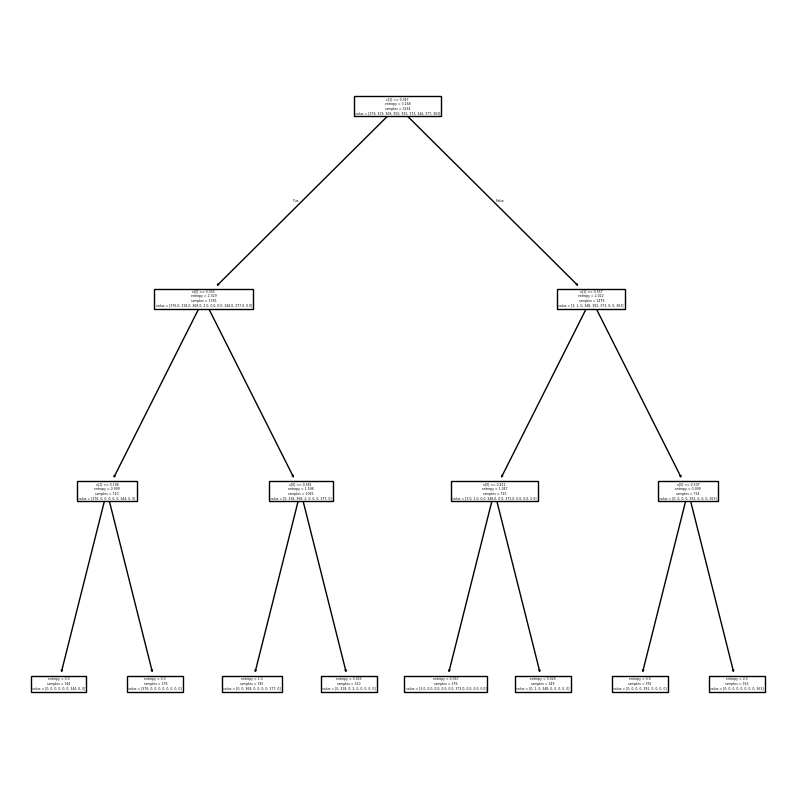

In [16]:
plt.figure(figsize=(10,10))

from sklearn import tree
tree.plot_tree(entropy.fit(x_train, y_train))
plt.show()

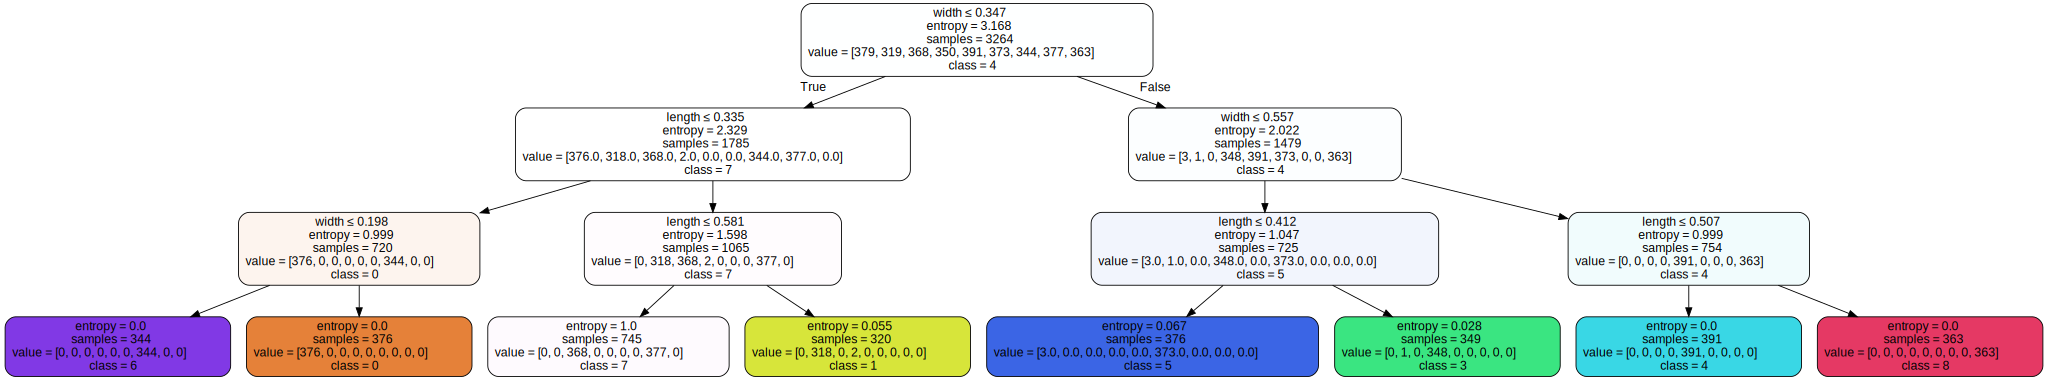

In [17]:
import graphviz
dot_data = tree.export_graphviz(entropy, out_file=None, feature_names=['length', 'width', 'height'], class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Klasifikasi Data Baru

In [18]:
new_fish = [[9,9,9]]
entropy.predict(new_fish)
print(le.inverse_transform(entropy.predict(new_fish)))

['Sillaginopsis panijus']


### Model

In [35]:
import pickle

pickle.dump(entropy, open('fish_id3.pkl', 'wb'))